This notebook applies clustering to our data. 

Note: should credit https://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/ where this code comes from

In [99]:
import re
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
%matplotlib inline

In [87]:
data=pd.read_csv("../../Data/Intermediate Data/final_all_files.csv")

data = data[data['candidate']=='trump']

data['base'] = np.where(data['event_type']=='rally', 1, 0) #recode rally vs other into new variable

In [88]:
texts = list(data['text'])

In [122]:
#this function was one option provided in the tutorial - decided to substitute for the function below instead
def textblob_tokenizer(str_input):
    
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [125]:
#custom tokenizer
def nltk_tokenizer(text):
    
    tokens = nltk.word_tokenize(text.lower())
    
    wordnet_lemmatizer = WordNetLemmatizer()
    
    #lemmatize & remove punctuation only tokens
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens if re.fullmatch(r'[^\w\s]', token)==None]
    
    return tokens

In [126]:
vec = TfidfVectorizer(tokenizer=nltk_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

/Users/heidiwallace/opt/anaconda3/envs/anlp/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,'','04,'16,'17,'18,'19,'20,'cause,'d,'em,...,—the,—they,—those,—to,—today,—we,—whether,—you,…a,…hey
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.028914,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.022091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.105606,0.0,0.0,0.0,0.008004,0.009527,0.0,0.000000,0.021231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006268,0.010160,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.028227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
number_of_clusters=2
km = KMeans(n_clusters=number_of_clusters)

km.fit(matrix)

KMeans(n_clusters=2)

In [128]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: s t ve people ll going don wa think thank
Cluster 1: 's 're n't -- going know 've wa people great


In [129]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,"Hello, everybody. Hello, Orlando. Hello, Sanfo...",1
1,"Hello, everybody. Hello, Duluth. Hello, Duluth...",1
2,"Oh, thank you. Well, we won Pennsylvania last ...",1
3,"Thank you very much. Hello, Newport News. I kn...",1
4,"Hello Jacksonville, we love Jacksonville, I'm...",1
...,...,...
221,Good evening. I’d like to provide the American...,0
222,I know your pain. I know your hurt. We had an ...,0
223,I would like to begin by addressing the heinou...,0
224,"My fellow Americans, I want to speak to you t...",0


In [130]:
results = results.merge(data['base'], left_index=True, right_index=True)

In [131]:
#sort of an accuracy calculation - actually pretty decent overlap with our classification
sum(results['category']==results['base']) / results.shape[0]

0.8657407407407407

In [143]:
#normalized mutual information score
nmi=metrics.normalized_mutual_info_score(results['category'], results['base'])
print("%.3f NMI" % nmi)

0.443 NMI


In [132]:
#make another df from model with top two featuress
vec = TfidfVectorizer(tokenizer=nltk_tokenizer,
                      stop_words='english',
                      use_idf=True,
                      max_features=2)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

/Users/heidiwallace/opt/anaconda3/envs/anlp/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,'re,'s
0,0.657526,0.753432
1,0.478676,0.877992
2,0.525337,0.850894
3,0.520530,0.853844
4,0.438211,0.898872
...,...,...
221,0.000000,0.000000
222,0.000000,0.000000
223,0.000000,0.000000
224,0.000000,1.000000


In [133]:
df.columns = ['apostrophe-re', 'apostrophe-s']

In [134]:
df.columns

Index(['apostrophe-re', 'apostrophe-s'], dtype='object')

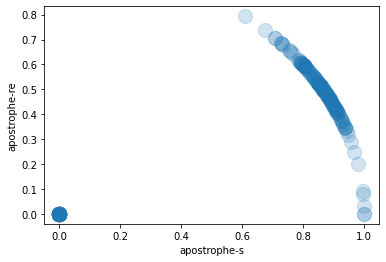

In [137]:
ax = df.plot(kind='scatter', x='apostrophe-s', y='apostrophe-re', alpha=0.2, s=200)

This is interesting, not entirely sure what to make of it. Maybe we've got like three-ish groups here? Using the textblob_tokenizer function resulted in a clearer delineation

Now trying Bamman's clustering code from 5.eda/HaikuKMeans

In [1]:
import nltk
from scipy import sparse
from sklearn import metrics
import math
import random

In [2]:
def run_all(haiku, others, feature_function):
    
    X, Y, featurize_vocab=feature_function(haiku, others)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    nmi=metrics.normalized_mutual_info_score(Y, kmeans.labels_)
    print("%.3f NMI" % nmi)

In [3]:
# This function takes in a list of haiku poems and non-haiku poems, and returns:

# X (sparse matrix, with poems as rows and features as columns)
# Y (list of poem labels, with 1=haiku and 0=non-haiku)
# feature_vocab (dict mapping feature name to feature ID)

def unigram_featurize_all(haiku, others):

    def unigram_featurize(poem, feature_vocab):
        
        # featurize text by just noting the binary presence of words within it
        
        feats={}

        tokens=nltk.word_tokenize(poem.lower())
        for token in tokens:
            if token not in feature_vocab:
                feature_vocab[token]=len(feature_vocab)
            feats[feature_vocab[token]]=1
        return feats

    feature_vocab={}
    data=[]
    Y=[]

    for poem in haiku:
        feats=unigram_featurize(poem, feature_vocab)
        data.append(feats)
        Y.append(1)
    for poem in others:
        feats=unigram_featurize(poem, feature_vocab)
        data.append(feats)
        Y.append(0)
    
    # since the data above has all haiku ordered before non-haiku, let's shuffle them
    temp = list(zip(data, Y))
    random.shuffle(temp)
    data, Y = zip(*temp)

    # we'll use a sparse representation since our features are sparse
    X=sparse.lil_matrix((len(data), len(feature_vocab)))

    for idx,feats in enumerate(data):
        for f in feats:
            X[idx,f]=feats[f]
    
    return X, Y, feature_vocab

In [10]:
haiku = list(data['text'][data['base']==1])

In [13]:
others = list(data['text'][data['base']==0])

In [14]:
run_all(haiku, others, unigram_featurize_all)

0.596 NMI
